In [1]:
import re
import math
import numpy as np
import scipy.io as sio
from sklearn.svm import SVC
from matplotlib import pyplot

## Reading data

In the following section, we will analyse \*.mat files provided by Andrew's Ng course.

In [2]:
from load_mat import load_mat

x, y = load_mat('./data/ex6data1.mat', 'X', 'y')

## Plotting simple chart for SVM

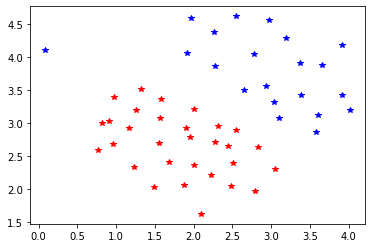

In [3]:
from plot_data import plot_data

plot_data(x, y)

## Predicting hyperplane

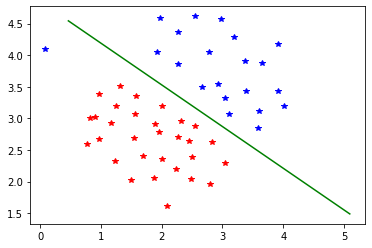

In [4]:
from predict_linear import predict_linear

new_x = np.linspace(min(x[0] - 1.5), max(x[0] + .5), 100)
new_y = predict_linear(x, y, new_x)
plot_data(x, y)
pyplot.plot(new_x, new_y, color='g')
pyplot.show()

## Predicting SVM using RBF method

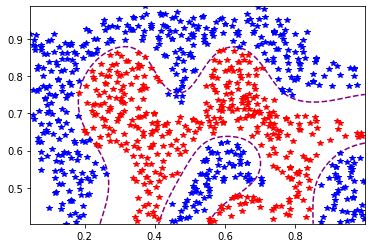

In [5]:
from predict_rgb import predict_rgb


x, y = load_mat('data/ex6data2.mat', 'X', 'y')
(XX, YY, Z) = predict_rgb(x, y)
pyplot.contour(XX, YY, Z, 1, linestyles = 'dashed', colors = 'purple')
plot_data(x, y)

## Email spam prediction

In [6]:
from train_svc import train_svc

x, y = load_mat('data/spam_train.mat', 'X', 'y')
clf = train_svc(x, y)

x_test, y_test = load_mat('data/spam_test.mat', 'Xtest', 'ytest')
predicted = clf.predict(x_test).reshape(1000, 1)
success_rate = (np.mean(np.equal(predicted, y_test) * 1)) * 100

print(f"Success rate is {round(success_rate, 2)}%")

Success rate is 98.9%


## Own email spam prediction

The very first thing we need to do when we want to classify spam/non-spam emails is normalization.

Let's remove HTTP addresses, email addresses, HTML tags or numbers to receive a normalized email content.

Code is available in process_email.py

In [7]:
def process_email(email):
    cleantext = email.lower()
    # Remove HTML <> tags
    html = re.compile('<.*?>')
    cleantext = re.sub(html, ' ', cleantext)
    # Replace numbers
    nums = re.compile('\d+([., ]?\d*)*')
    cleantext = re.sub(nums, 'number ', cleantext)
    # Replace HTTP(s) links
    links = re.compile('^(http|https)://')
    cleantext = re.sub(links, 'httpaddr ', cleantext)
    # Replace email addresses
    email = re.compile('[^\s]+@[^\s]+')
    cleantext = re.sub(email, 'emailaddr ', cleantext)
    # Replace $ (dollar) signs
    dollar = re.compile('[$]+')
    cleantext = re.sub(dollar, 'dollar ', cleantext)
    # Remove non-alphanumeric characters
    non_alpha_numeric = re.compile('[^0-9a-zA-Z]+')
    return re.sub(non_alpha_numeric, ' ', cleantext).strip()

## Reading dictionary

For further calculations, we need to have a vector containing the words (dictionary).

Below is a function that construct it from the given path containing words separated by a new line.

Code is available in get_vocab_list.py

## Create email features

As part of the email preparation we need a vector of 0s and 1s that indicates whether an email contains the particular word from a dictionary.

Code is available in email_features.py

In [8]:
def email_features(word_indices, dictionary):
    n = np.shape(dictionary)[0] - 1
    x = np.zeros((n, 1))
    for i in range(0, np.shape(word_indices)[0]):
        index = int(word_indices[i][0])
        x[index, 0] = 1
    return x

## Stem text

When dealing with text, we often want to replace all occurences that has exactly the same meaning.

For instance, we would like to convert this:

***Programmer is programming a program***

to this:

***Programm is program a program***

This is call a word stemming and a separate machine learning topic. In our case, we will use NLTK library for python.

In [9]:
def stem_text(text):
    ps = PorterStemmer()
    stemmed_text = []
    for word in text.split(" "):
        stemmed_text.append(ps.stem(word))
    return " ".join(stemmed_text)

## Convert email content to word indices

As part of next function, email content will be converted from a plain (preprocessed!) text to a vector of indices.

Indices are indexes of words found in a dictionary.

Code is available in calc_word_indices.py

In [10]:
def calc_word_indices(text, dict_vector):
    words = text.split(' ')
    words_indices_vector = np.array([])
    for i in range(0, np.size(words)):
        words_indices_vector = np.append(words_indices_vector, np.where(dict_vector.ravel() == words[i])[0])
    return words_indices_vector.reshape(len(words_indices_vector), 1)

## Spam prediction

In [11]:
from is_spam import is_spam
from load_mat import load_mat
from train_svc import train_svc

# Amend the path to your email
email = open('data/emailSample2.txt').read()

x, y = load_mat('data/spam_train.mat', 'X', 'y')
clf = train_svc(x, y)
print("Email is a spam" if is_spam(email, clf) else "Email is not a spam")

Email is not a spam
